In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from sklearn import datasets

In [2]:
iris_data = datasets.load_iris()

In [7]:
iris_x = iris_data.data
iris_y = iris_data.target
print("iris_x shape = ",iris_x.shape)
print("iris_y shape = ",iris_y.shape)
print("names of Features: ",iris_data.feature_names)
print("names of Lables: ",iris_data.target_names)

iris_x shape =  (150, 4)
iris_y shape =  (150,)
names of Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
names of Lables:  ['setosa' 'versicolor' 'virginica']


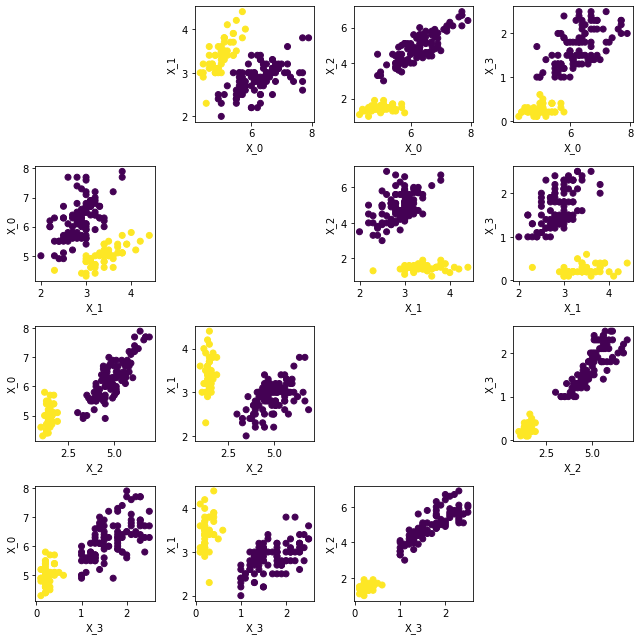

In [9]:
plt.figure(figsize=(9,9))
for i in range(4):
    for j in range(4):
        if i == j:
            continue
        plt.subplot(4,4, i*4+j+1)
        plt.scatter(iris_x[:,i], iris_x[:,j], c=iris_y==0)
        plt.xlabel("X_{}".format(i))
        plt.ylabel("X_{}".format(j))
plt.tight_layout()

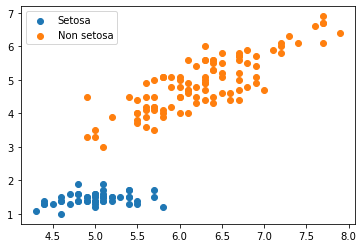

In [15]:
train_x = iris_x[:,[0,2]] # (150,2): x_0 , x_2 "input vector"
train_y = np.where(iris_y == 0 , 1 , 0) # wherever setosa(0) put one ,else put 0
plt.scatter(train_x[np.where(train_y == 1),0] , train_x[np.where(train_y == 1),1] , label='Setosa')
plt.scatter(train_x[np.where(train_y == 0),0] , train_x[np.where(train_y == 0),1] , label='Non setosa')
plt.legend()
plt.show()

In [29]:
class perceprtron:
    def __init__(self, learning_rate=0.1):
        self.w = np.random.rand(3,) # random initialization
        self.lr = learning_rate #
    
    def plot_data_and_boudary(self, x, y):
        """Helper Data to plot"""
        plt.scatter(x[np.where(y == 1),0], x[np.where(y == 1),1] , label='setosa')
        plt.scatter(x[np.where(y == 0),0], x[np.where(y == 0),1] , label='Not setosa')
        x1_min = x[:,0].min()
        x1_max = x[:,0].max()
        desecion_x = np.linspace(x1_min *0.9 , x1_max *1.1 , 100)
        desecion_y = (-self.w[1]/self.w[2]) * desecion_x + (-self.w[0]/self.w[2])
        plt.plot(desecion_x,desecion_y , linestyle='--',linewidth=1,color='red')
        plt.legend()
        plt.show()
        
    def predict(self ,input_x):
        x_plus_bias = np.hstack((1,input_x))
        pred = (np.dot(x_plus_bias,self.w) > 0).astype(np.float32) # actual response
        return pred
    
    def compute_accuracy(self,x,y):
        m = x.shape[0]
        correct = 0
        for i in range(m):
            pred = self.predict(x[i,:])
            if pred == y[i]:
                correct+= 1
        return float(correct) / m
    
    def train_one_epoch(self, train_x, train_y) :
        converged = True
        m = train_x.shape[0]
        new_w = self.w.copy()
        for i in range(m):
            cur_x = train_x[i,]
            pred = self.predict(cur_x)
            e = train_y[i]-pred
            if e != 0:
                x_plus_bias = np.hstack((1,cur_x))
                new_w = new_w + e * self.lr * x_plus_bias
                converged = False
        self.w = new_w
        return converged


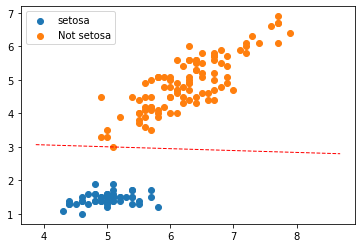

281
1.0


In [34]:
perceptron = perceprtron(learning_rate=0.00001)
perceptron.plot_data_and_boudary(train_x,train_y)
for step_idx in range(5000):
    clear_output(wait = True)
    is_converged = perceptron.train_one_epoch(train_x,train_y)
    perceptron.plot_data_and_boudary(train_x,train_y)
    print (step_idx)
    print (perceptron.compute_accuracy(train_x,train_y))
    if is_converged:
        break
    